
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [93]:
import pandas as pd
d = dict(Kommun = ["Malmö", "Stockholm", "Uppsala", "Göteborg"], Population = [347949, 975551, 233839, 583056])
df = pd.DataFrame(data=d)
df

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [94]:
df[df["Kommun"] == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


In [95]:
df_sorted = df.sort_values(by=["Population"], ascending = False)
df_sorted

,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


In [96]:
df_sorted.iloc[3:]

,Kommun,Population
2,Uppsala,233839


In [97]:
for i in range(4):
    print((df["Population"][i]/10379295)*100)

3.3523375142531355
9.399010241061651
2.252937217797548
5.617491361407494


In [98]:
population_percentage = [(df["Population"][i]/10379295)*100 for i in range(4)]
population_percentage

[3.3523375142531355, 9.399010241061651, 2.252937217797548, 5.617491361407494]

In [99]:
df["Population(%)"] = population_percentage
df

,Kommun,Population,Population(%)
0,Malmö,347949,3.352338
1,Stockholm,975551,9.399010
2,Uppsala,233839,2.252937
3,Göteborg,583056,5.617491


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


In [100]:
df = pd.read_excel("../Data/komtopp50_2020.xlsx", sheet_name = "Totalt", header = 5)
df.head()

,Rang,Unnamed: 1,Kommun,Folkmängd 31 december,Unnamed: 4,Förändring
0,2020,2019,NaN,2020,2019,%
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276


In [101]:
c1 = df.columns.to_list()
c2 = df.iloc[0].to_list()
c1[1] = "Rang"
c1[3] = "Folkmängd"
c1[4] = "Folkmängd"
c2[2] = ""
c1,c2

(['Rang', 'Rang', 'Kommun', 'Folkmängd', 'Folkmängd', 'Förändring'],
 [2020, 2019, '', 2020, 2019, '%'])

In [102]:
c3 = []
for i,j in zip(c1,c2):
    temp = i +" " + str(j)
    c3.append(temp)

c3

['Rang 2020',
 'Rang 2019',
 'Kommun ',
 'Folkmängd 2020',
 'Folkmängd 2019',
 'Förändring %']

In [103]:
df.columns = c3
df.drop(df.index[0], inplace=True)
df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring %
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276
5,169,167,Arboga,14039,14087,-0.34074
...,...,...,...,...,...,...
286,54,55,Österåker,46644,45574,2.34783
287,116,115,Östhammar,22251,22250,0.004494
288,160,159,Östra Göinge,15017,15007,0.066636
289,284,284,Överkalix,3289,3315,-0.784314


In [104]:
df = df.sort_values(by=["Rang 2020"])
df.reset_index(drop=True, inplace=True)
df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring %
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.65167
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309


In [105]:
df_small = df.tail()
df_small

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring %
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309
289,290,290,Bjurholm,2387,2408,-0.872093


In [106]:
pop2020 = df["Folkmängd 2020"].sum()
pop2019 = df["Folkmängd 2019"].sum()
print(f"Sveriges befolkning 2020: {pop2020} \nSveriges befolkning 2019: {pop2019}")

Sveriges befolkning 2020: 10379295 
Sveriges befolkning 2019: 10327589


In [116]:
df_large = df.head()
df_large

0    Stockholm
1     Göteborg
2        Malmö
3      Uppsala
4    Linköping
Name: Kommun , dtype: object

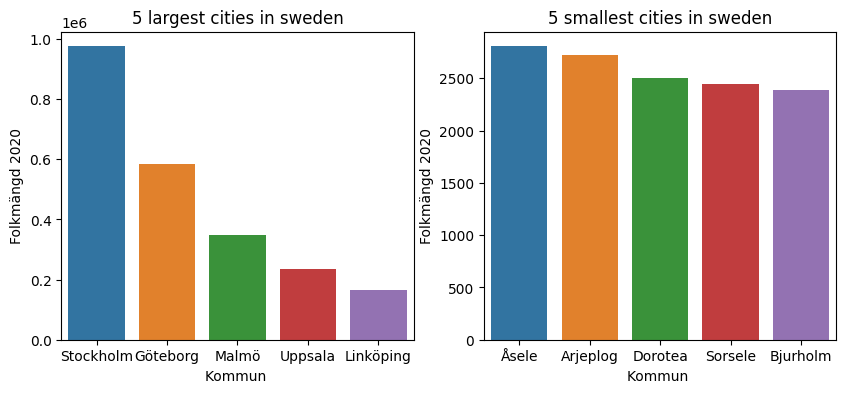

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize = (10,4))

data_frames = (df_large, df_small)
titles = ("5 largest cities in sweden", "5 smallest cities in sweden")

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x = "Kommun ",  y = "Folkmängd 2020", ax = ax[i])
    ax[i].set(title = title)

---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---